In [190]:
# loading libraries 

import pandas as pd
import numpy as np

In [191]:
#loading data
df = pd.read_csv("LinkedIn-company-info.csv")

In [192]:
df

,id,name,country_code,locations,followers,employees_in_linkedin,about,specialties,company_size,organization_type,...,url,updates,slogan,affiliated,funding,investors,formatted_locations,stock_info,get_directions_url,description
0,fleak,Fleak,US,"[""San Jose, US""]",312,11,Fleak unblocks your data team from batch proce...,"APIs, Microservices, Serverless, Data Pipeline...",2-10 employees,Privately Held,...,https://www.linkedin.com/company/fleak,"[{""comments_count"":1,""likes_count"":3,""post_id""...",AI Workflows. Simplified.,NaN,"{""last_round_date"":""2024-05-01T00:00:00.000Z"",...","[""CoreNest Capital""]","[""San Jose, US""]",NaN,"[{""directions_url"":""https://www.bing.com/maps?...",Fleak | 312 followers on LinkedIn. AI Workflow...
1,balance-cash,Balance,US,"[""Denver, CO 80224, US""]",235,3,Balance is financial forecasting for the indep...,"Financial Forecasting, Money Management, Indep...",2-10 employees,Privately Held,...,https://www.linkedin.com/company/balance-cash,"[{""images"":[""https://media.licdn.com/dms/image...",Independent workers take a different view of t...,NaN,"{""last_round_date"":""2023-09-15T00:00:00.000Z"",...","[""Techstars""]","[""Denver, CO 80224, US""]",NaN,"[{""directions_url"":""https://www.bing.com/maps?...",Balance | 235 followers on LinkedIn. Independe...
2,ergotech-systems-inc-,"ErgoTech Systems, Inc.",US,"[""190 Central Park Square Los Alamos, NM 87544...",126,4,ErgoTech develops and sells factory automation...,Industrial Automation and Semiconductor,2-10 employees,Privately Held,...,https://www.linkedin.com/company/ergotech-syst...,"[{""external_link"":""https://www.linkedin.com/re...",Data Collection ○ Analytics ○ AI ○ Cloud ○ IOT...,NaN,"{""last_round_date"":""2023-02-24T00:00:00.000Z"",...","[""Small Business Innovation Research""]","[""190 Central Park Square, Los Alamos, NM 8754...",NaN,"[{""directions_url"":""https://www.bing.com/maps?...","ErgoTech Systems, Inc. | 126 followers on Link..."
3,clubready,"ClubReady, LLC",US,"[""14515 North Outer Forty Suite 300 Chesterfie...",2652,109,ClubReady is a web-based fitness management pl...,"Member Management, Billing, HealthClub Managem...",51-200 employees,Privately Held,...,https://www.linkedin.com/company/clubready,"[{""external_link"":""https://www.linkedin.com/re...",Build Your Fitness Business for the Future,NaN,"{""last_round_date"":""2016-04-22T00:00:00.000Z"",...","[""Level Equity Management""]","[""14515 North Outer Forty, Suite 300, Chesterf...",NaN,"[{""directions_url"":""https://www.bing.com/maps?...","ClubReady, LLC | 2,652 followers on LinkedIn. ..."
4,ewa,Electronic Warfare Associates (EWA),US,"[""13873 Park Center Rd 5th Floor Herndon, VIRG...",5089,315,"EWA is a veteran-owned, small broad-based tech...","Counter-UAS Technologies, Cyber Operations and...",201-500 employees,Privately Held,...,https://www.linkedin.com/company/ewa,"[{""external_link"":""https://www.linkedin.com/re...",Enabling a More Secure Future,"[{""Links"":""https://www.linkedin.com/company/ew...","{""last_round_date"":""2015-06-11T00:00:00.000Z"",...","[""American Capital""]","[""13873 Park Center Rd, 5th Floor, Herndon, VI...",NaN,"[{""directions_url"":""https://www.bing.com/maps?...","Electronic Warfare Associates (EWA) | 5,089 fo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,compusoft-group,Compusoft Group | A Cyncly Company,"NO,GB,FR,DE,AU,BE,DK,ES,IT,CH,ZA,FI,SE","[""Sarpsborg, NO"",""London, GB"",""42, Rue de Roze...",9720,124,Compusoft and 2020 united via a merger in 2021...,"kitchen design software, bathroom design softw...","1,001-5,000 employees",Privately Held,...,https://www.linkedin.com/company/compusoft-group,"[{""comments_count"":3,""likes_count"":337,""post_i...",Powering sales by simplifying complexity,"[{""Links"":""https://www.linkedin.com/company/cy...","{""last_round_date"":""2018-08-11T00:00:00.000Z"",...","[""TA Associates""]","[""Sarpsborg, NO"",""London, GB"",""42, Rue de Roze...",Na

In [193]:
#checking basic info.

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1000 non-null   object 
 1   name                   1000 non-null   object 
 2   country_code           1000 non-null   object 
 3   locations              1000 non-null   object 
 4   followers              1000 non-null   int64  
 5   employees_in_linkedin  1000 non-null   int64  
 6   about                  1000 non-null   object 
 7   specialties            976 non-null    object 
 8   company_size           1000 non-null   object 
 9   organization_type      1000 non-null   object 
 10  industries             1000 non-null   object 
 11  website                1000 non-null   object 
 12  crunchbase_url         1000 non-null   object 
 13  founded                937 non-null    float64
 14  company_id             1000 non-null   int64  
 15  emplo

In [194]:
#dropping duplicates 

df = df.drop_duplicates()

In [195]:
#handeling missing values

df = df.fillna({
    "funding ":"No funding info",
    "investors":"Unknown",
    "slogan":"No slogan",

})

In [196]:
#converting founded year 

df["founded"] = pd.to_numeric(df["founded"],errors = "coerce")


In [197]:
#Extract first location (cleaning up JSON_like format )

df["main_location"] = df["formatted_locations"].str.extract(r'\["([^"]+)')

In [198]:
#standardize company size categories 

def categorize_size(x):
    if "2-10" in str(x): return "small"
    if "11-50" in str(x): return "small"
    if "51-200" in str(x): return "Medium"
    if "201- 500" in str(x): return "Medium"
    if "501-1000" in str(x): return "Large"
    if "1001" in str(x):return "Large"
    return "Unknown"

df["size_category"] = df["company_size"].apply(categorize_size)
df.head()

,id,name,country_code,locations,followers,employees_in_linkedin,about,specialties,company_size,organization_type,...,slogan,affiliated,funding,investors,formatted_locations,stock_info,get_directions_url,description,main_location,size_category
0,fleak,Fleak,US,"[""San Jose, US""]",312,11,Fleak unblocks your data team from batch proce...,"APIs, Microservices, Serverless, Data Pipeline...",2-10 employees,Privately Held,...,AI Workflows. Simplified.,NaN,"{""last_round_date"":""2024-05-01T00:00:00.000Z"",...","[""CoreNest Capital""]","[""San Jose, US""]",NaN,"[{""directions_url"":""https://www.bing.com/maps?...",Fleak | 312 followers on LinkedIn. AI Workflow...,"San Jose, US",small
1,balance-cash,Balance,US,"[""Denver, CO 80224, US""]",235,3,Balance is financial forecasting for the indep...,"Financial Forecasting, Money Management, Indep...",2-10 employees,Privately Held,...,Independent workers take a different view of t...,NaN,"{""last_round_date"":""2023-09-15T00:00:00.000Z"",...","[""Techstars""]","[""Denver, CO 80224, US""]",NaN,"[{""directions_url"":""https://www.bing.com/maps?...",Balance | 235 followers on LinkedIn. Independe...,"Denver, CO 80224, US",small
2,ergotech-systems-inc-,"ErgoTech Systems, Inc.",US,"[""190 Central Park Square Los Alamos, NM 87544...",126,4,ErgoTech develops and sells factory automation...,Industrial Automation and Semiconductor,2-10 employees,Privately Held,...,Data Collection ○ Analytics ○ AI ○ Cloud ○ IOT...,NaN,"{""last_round_date"":""2023-02-24T00:00:00.000Z"",...","[""Small Business Innovation Research""]","[""190 Central Park Square, Los Alamos, NM 8754...",NaN,"[{""directions_url"":""https://www.bing.com/maps?...","ErgoTech Systems, Inc. | 126 followers on Link...","190 Central Park Square, Los Alamos, NM 87544, US",small
3,clubready,"ClubReady, LLC",US,"[""14515 North Outer Forty Suite 300 Chesterfie...",2652,109,ClubReady is a web-based fitness management pl...,"Member Management, Billing, HealthClub Managem...",51-200 employees,Privately Held,...,Build Your Fitness Business for the Future,NaN,"{""last_round_date"":""2016-04-22T00:00:00.000Z"",...","[""Level Equity Management""]","[""14515 North Outer Forty, Suite 300, Chesterf...",NaN,"[{""directions_url"":""https://www.bing.com/maps?...","ClubReady, LLC | 2,652 followers on LinkedIn. ...","14515 North Outer Forty, Suite 300, Chesterfie...",Medium
4,ewa,Electronic Warfare Associates (EWA),US,"[""13873 Park Center Rd 5th Floor Herndon, VIRG...",5089,315,"EWA is a veteran-owned, small broad-based tech...","Counter-UAS Technologies, Cyber Operations and...",201-500 employees,Privately Held,...,Enabling a More Secure Future,"[{""Links"":""https://www.linkedin.com/company/ew...","{""last_round_date"":""2015-06-11T00:00:00.000Z"",...","[""American Capital""]","[""13873 Park Center Rd, 5th Floor, Herndon, VI...",NaN,"[{""directions_url"":""https://www.bing.com/maps?...","Electronic Warfare Associates (EWA) | 5,089 fo...","13873 Park Center Rd, 5th Floor, Herndon, VIRG...",Unknown


In [199]:
#Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

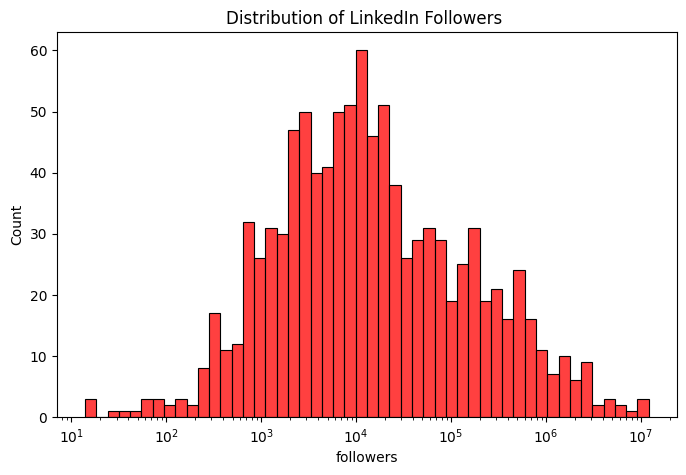

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#--------Follower distribution ---------
plt.figure(figsize = (8,5))
sns.histplot(df["followers"],bins = 50,color = "red",log_scale = True)
plt.title("Distribution of LinkedIn Followers ")
plt.show()

In [201]:
#commemt will be added later on

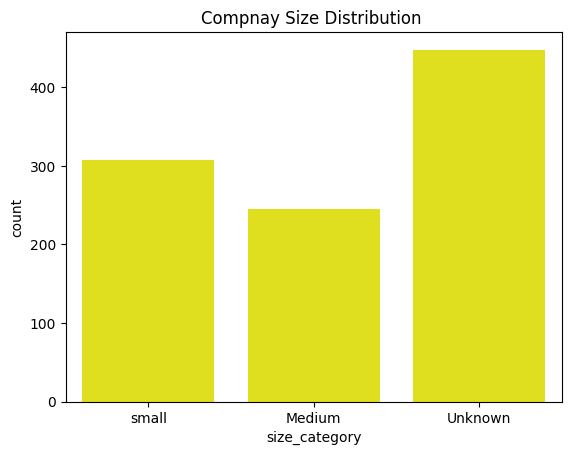

In [202]:
#company size distribution 

sns.countplot(x="size_category",data=df,color="yellow")
plt.title("Compnay Size Distribution ")
plt.show()

In [203]:
#comment will be added later on

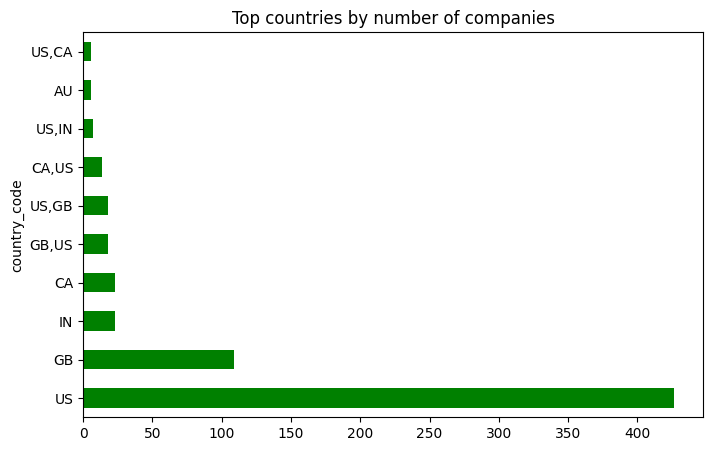

In [204]:
#top 10 countries 

top_countries = df["country_code"].value_counts().head(10)
top_countries.plot(kind="barh",figsize=(8,5),color = "g")
plt.title("Top countries by number of companies")

plt.show()

In [205]:
#comment will be added later on

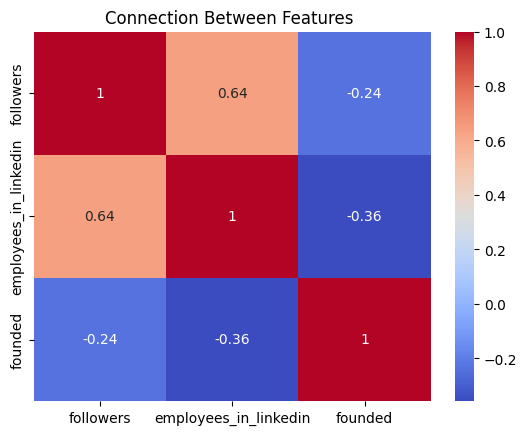

In [206]:
#correlation heatmap
numeric_df=df[["followers","employees_in_linkedin","founded"]]
sns.heatmap(numeric_df.corr(),annot=True,cmap="coolwarm")
plt.title("Connection Between Features ")
plt.show()

In [207]:
#coment will be added later on

In [208]:
#---------------FUNDING & INVESTOR ANALYSIS ---------
import ast


#extract funding year

def extract_year(funding_str):
    if "last_round_date" in str(funding_str):
        try:
            date=eval(funding_str).get("last_round_date","")
            return pd.to_datetime(date,errors="coerce").year
        except:
            return np.nan
    return np.nan
df["funding_year"]=df["funding"].apply(extract_year)
    

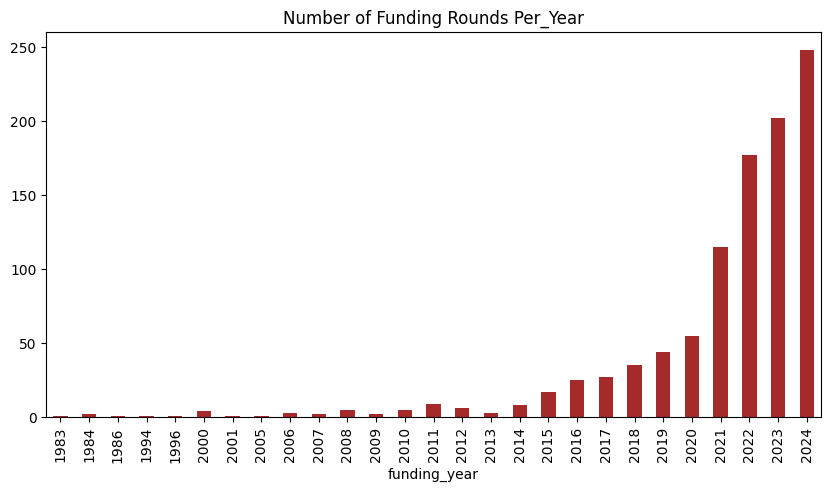

In [209]:
#plotting funding over time

df["funding_year"].dropna().value_counts().sort_index().plot(kind="bar",color = "brown" ,figsize=(10,5))
plt.title("Number of Funding Rounds Per_Year")
plt.show()

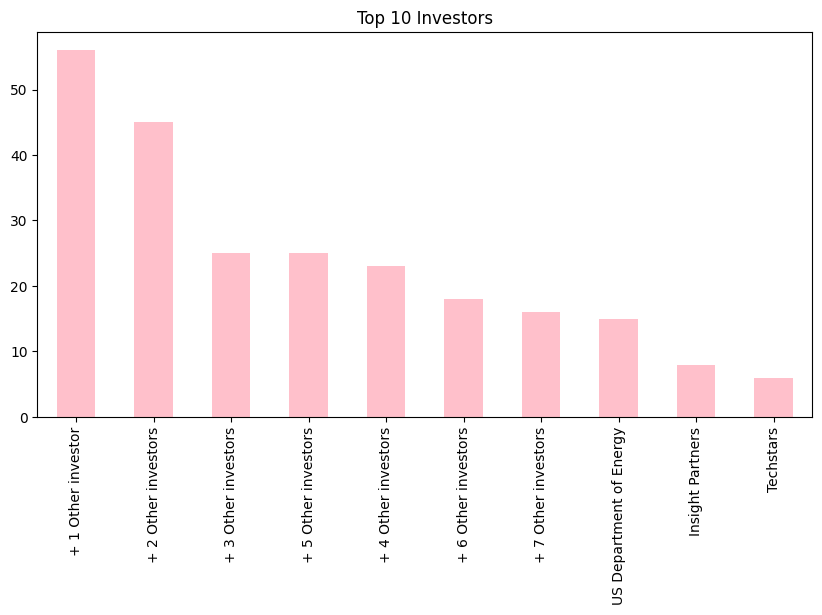

In [210]:
#Most common investors

def extract_investors(inv_str):
    try:
        return ast.literal_eval(inv_str)
    except:
        return[]

all_investors=df["investors"].dropna().apply(extract_investors).sum()
pd.Series(all_investors).value_counts().head(10).plot(kind="bar",color = "pink",figsize=(10,5))
plt.title("Top 10 Investors")
plt.show()

In [211]:
#coments will be added later on

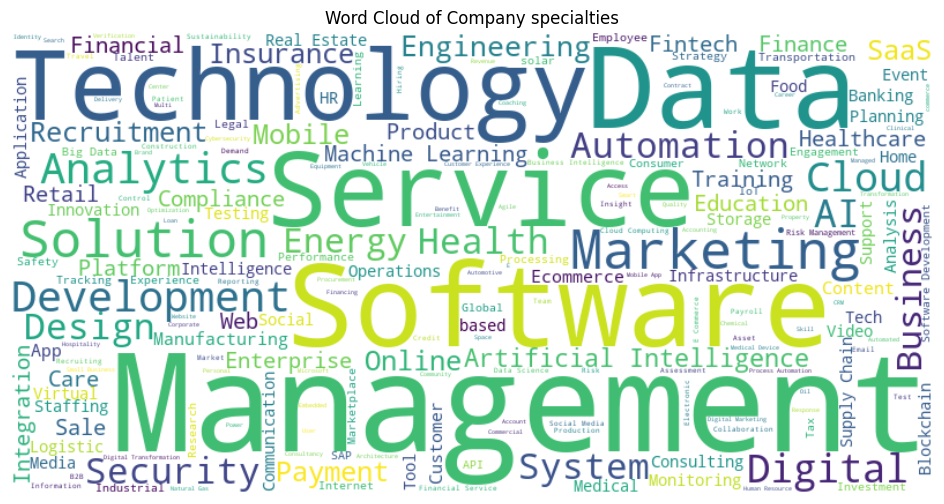

In [212]:
##Text Mining and NLP 

from wordcloud import WordCloud

# Combining all specialties into one text

all_specialties = " ".join(df["specialties"].dropna().astype(str))

#Generating WordCloud

wc = WordCloud(width = 800, height = 400, background_color = "White").generate(all_specialties)
plt.figure(figsize = (12,6))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud of Company specialties")
plt.show()

In [213]:
#comment will be added later on

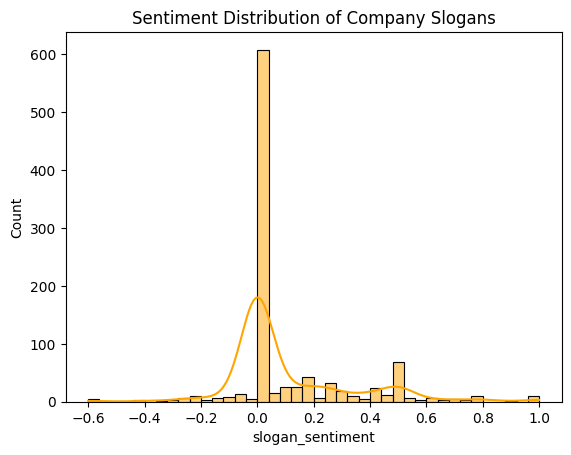

In [214]:
##sentiment analysis of slogans

from textblob import TextBlob
df["slogan_sentiment"] = df["slogan"].apply(lambda x :TextBlob(str(x)). sentiment.polarity)
sns.histplot(df["slogan_sentiment"],bins = 40,color = "orange",kde = True)
plt.title("Sentiment Distribution of Company Slogans")
plt.show()

In [215]:
#comment will be added later on

In [216]:
##Machine learning Models
#loding libraries 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression 
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score

In [217]:
#Regression : predicting followers

X = df[["employees_in_linkedin","founded"]].fillna(0)
Y = df["followers"].fillna(0)
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
reg = LinearRegression().fit(X_train,Y_train)
Y_pred = reg.predict(X_test)
print("Regression MSE :",mean_squared_error(Y_test,Y_pred))

Regression MSE : 1208785090668.816


In [218]:
#classification : predicting company size

X_cls = df[["followers","employees_in_linkedin"]].fillna(0)
Y_cls = df["size_category"].fillna(0)
X_train, X_test, Y_train,Y_test = train_test_split(X_cls,Y_cls,test_size = 0.2,random_state = 42)
clf = LogisticRegression(max_iter=1000).fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print("Classification Accuracy:", accuracy_score(Y_test,Y_pred))

Classification Accuracy: 0.81


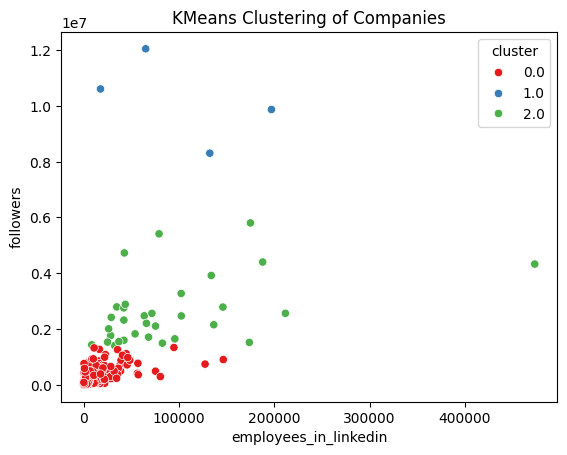

In [232]:
#clustering groups
X_cluster = df[["followers","employees_in_linkedin"]].fillna(0)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_cluster)         
df.loc[X_cluster.index, "cluster"] = labels    
sns.scatterplot(x="employees_in_linkedin",y="followers",hue="cluster",data=df, palette="Set1")
plt.title("KMeans Clustering of Companies")
plt.show()


In [ ]:
#comments will be added later on